In [2]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model, cross_validation
%matplotlib inline

In [3]:
#reading the input file
df_mpg = pd.read_csv('carMPG.csv',sep=',',index_col=None)

In [4]:
df_mpg.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_year,Origin,Car_Name
0,8.0,8,307.0,130,3504,12.0,2015,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,2015,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,2015,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,2015,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,2015,1,ford torino


In [5]:
type(df_mpg)

pandas.core.frame.DataFrame

In [6]:
df_mpg.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower       object
Weight            int64
Acceleration    float64
Model_year        int64
Origin            int64
Car_Name         object
dtype: object

In [7]:
df_mpg.describe()

,MPG,Cylinders,Displacement,Weight,Acceleration,Model_year,Origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.489447,5.454774,193.425879,2970.424623,15.568090,2008.989950,1.572864
std,7.849757,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,8.000000,3.000000,68.000000,1613.000000,8.000000,2003.000000,1.000000
25%,17.125000,4.000000,104.250000,2223.750000,13.825000,2006.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,2009.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,2012.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,2015.000000,3.000000


In [8]:
#Identifying target and independent variables
model = pd.DataFrame(df_mpg, columns = ['MPG', 'Acceleration'])
model.head()

,MPG,Acceleration
0,8.0,12.0
1,15.0,11.5
2,18.0,11.0
3,16.0,12.0
4,17.0,10.5


In [9]:
x = np.array(model.drop(['MPG'],1))
y = np.array(model['MPG'])

In [10]:
#train and test split
x_train, x_test, y_train, y_test = cross_validation.train_test_split(x,y,test_size=0.20)

In [11]:
#linear regression model
regr = linear_model.LinearRegression()

In [12]:
x_train=x_train.reshape(len(x_train),1)
y_train=y_train.reshape(len(y_train),1)
print(x_train.shape, y_train.shape)

(318, 1) (318, 1)


In [13]:
#training the model
regr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
x_test=x_test.reshape(len(x_test),1)
y_test=y_test.reshape(len(y_test),1)
print(x_test.shape, y_test.shape)

(80, 1) (80, 1)


In [15]:
#Displaying the coefficients coef, intercept and residues
print('Coefficient: \n', regr.coef_)
print('Residue: \n', regr.residues_)
print('Intercept: \n', regr.intercept_)

Coefficient: 
 [[ 1.23593117]]
Residue: 
 [ 16407.31110593]
Intercept: 
 [ 4.39988234]


C:\Users\ra20024902\Downloads\WinPython-64bit-3.6.2.0Qt5\python-3.6.2.amd64\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


In [16]:
#predicting the result
predict = regr.predict(x_test)
predict

array([[ 19.23105637],
       [ 21.20854624],
       [ 18.61309079],
       [ 23.55681546],
       [ 22.56807053],
       [ 22.3208843 ],
       [ 25.41071222],
       [ 22.69166365],
       [ 21.08495313],
       [ 24.66915352],
       [ 28.37694703],
       [ 23.55681546],
       [ 23.8040017 ],
       [ 22.93884988],
       [ 31.71396118],
       [ 24.66915352],
       [ 27.88257456],
       [ 27.88257456],
       [ 23.43322235],
       [ 19.23105637],
       [ 27.88257456],
       [ 25.16352599],
       [ 24.17478105],
       [ 26.27586404],
       [ 20.21980131],
       [ 22.19729118],
       [ 27.26460897],
       [ 22.3208843 ],
       [ 23.92759482],
       [ 31.8375543 ],
       [ 24.42196728],
       [ 20.46698754],
       [ 23.55681546],
       [ 28.50054014],
       [ 29.98365755],
       [ 25.2871191 ],
       [ 28.99491261],
       [ 27.88257456],
       [ 28.12976079],
       [ 31.46677495],
       [ 26.39945715],
       [ 21.70291871],
       [ 29.73647131],
       [ 24

In [17]:
regr.score(x_test, y_test)

0.14318415534610507

In [18]:
# The mean squared error
print("Mean squared error: %.2f"% np.mean((predict - y_test) ** 2))

Mean squared error: 46.23


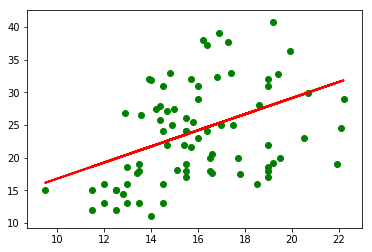

In [19]:
#plotting
plt.plot(x_test, predict, color='red',linewidth=2)
plt.scatter(x_test,y_test, color='green')